In [3]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import f1_score
from gensim.models import FastText

In [94]:
def load_lex_data(dataset_name, feature_set):
    print("loading lex data for", dataset_name)
    dataset = pd.read_csv("../cleaned/" + dataset_name + "_clean.csv")
    
    targets = dataset["a"]
    inputs = dataset[feature_set]
    #inputs = dataset[["wc", "ewc", "hc", "ac", "fc"]]
    train_x, test_x, train_y, test_y = train_test_split(inputs, targets, test_size=0.2)
    return train_x, test_x, train_y, test_y    

def load_vector_data(dataset_name):
    print("loading vector data for", dataset_name)
    sentences = pd.read_csv("../cleaned/" + dataset_name + "_stems.csv", delimiter=",").astype(str).values.tolist()
    targets = pd.read_csv("../cleaned/" + dataset_name + "_clean.csv", delimiter=",").astype(str)["a"].tolist() 
    
    # replace placeholders (" "), make one-string-sentences
    print("... replacing placeholders")
    for index, sample in enumerate(sentences): 
            sentences[index] = list(filter((" ").__ne__, sample))
    inputs = [" ".join(sentence) for sentence in sentences]
    
    # build model over sentences (size=dimension of word vectors), convert sentences to vectors
    vector_model = FastText(size=32, window=3, min_count=1)
    vector_model.build_vocab(inputs)  
    vector_model.train(sentences=inputs, total_examples=len(inputs), total_words=vector_model.corpus_total_words, epochs=10)
    inputs = [vector_model.wv[sample] for sample in inputs]
    
    # split data and return
    train_x, test_x, train_y, test_y = train_test_split(inputs, targets, test_size=0.2)
    return train_x, test_x, train_y, test_y    

def classify_with_lr(train_x, test_x, train_y, test_y): 
    print("building lr model")
    lr = LogisticRegression(multi_class="multinomial", solver="newton-cg")
    print("... training model")
    lr.fit(train_x, train_y)
    print("... calcularing score")
    pred_y = lr.predict(test_x)
    # model metadata
    score, f1_scoore = lr.score(train_x, train_y), f1_score(test_y, pred_y, average="weighted")
    return (test_y, pred_y, score, f1_scoore), lr.coef_ 
    
def draw_confusion_matrix(dataset_name, feature_set_name, test_y, pred_y, score, f1_scoore): 
    fig = plt.figure()
    hm = sn.heatmap(confusion_matrix(test_y, pred_y), fmt="d", linewidth=0.5, annot=True, square=True, xticklabels=["h", "s", "a", "f"], yticklabels=["h", "s", "a", "f"], cmap="PuRd")
    ax1 = fig.add_axes(hm)
    ax1.set(xlabel="predicted", ylabel="target")
    desc = "dataset: {} ({})\nscore: {}, f1_score: {}".format(dataset_name, feature_set_name, score, f1_scoore)
    fig.text(0.5, -0.1, desc, ha='center')
    plt.show()
    print("saving", "cm_lr_" + dataset_name + "_" + feature_set_name + ".png")
    fig.savefig("../img/cm_lr_" + dataset_name + "_" + feature_set_name + ".png", bbox_inches="tight")
    
def draw_coefficients_plot(dataset_name, feature_set_name, coefficients):
    num_features = len(coefficients[0])
    fig = plt.figure()
    for i, item in enumerate(coefficients):
        print("-",item)
        plt.plot(range(len(item)), item.T, ".")#, label=classes[i]
    desc = "dataset: {} ({})".format(dataset_name, feature_set_name)
    fig.text(0.5, -0.05, desc, ha='center')
    plt.xticks(range(0, num_features), features.get(feature_set_name), rotation=90)
    plt.hlines(0, 0, num_features, linestyle="dotted")
    #plt.legend()#loc=1
    plt.grid()
    plt.show()
    fig.savefig("../img/coef_lr_" + dataset_name + "_" + feature_set_name + ".png", bbox_inches="tight")

loading lex data for emotion
building lr model
... training model
... calcularing score
loading lex data for emotion
building lr model
... training model
... calcularing score
loading lex data for emotion


/home/marcel/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


building lr model
... training model


/home/marcel/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/marcel/.local/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


... calcularing score
loading lex data for norm_emotion
building lr model
... training model
... calcularing score
loading lex data for norm_emotion
building lr model
... training model
... calcularing score
loading lex data for norm_emotion


/home/marcel/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


building lr model
... training model
... calcularing score
loading lex data for tweet
building lr model
... training model
... calcularing score
loading lex data for tweet
building lr model
... training model
... calcularing score
loading lex data for tweet
building lr model
... training model


/home/marcel/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


... calcularing score
loading lex data for norm_tweet
building lr model
... training model
... calcularing score
loading lex data for norm_tweet
building lr model
... training model
... calcularing score
loading lex data for norm_tweet
building lr model
... training model
... calcularing score
- [-0.91175797  0.          0.81447961  0.          0.63511424  0.
 -0.5213199  -0.69286465]
- [ 0.37934956  0.         -0.12438502  0.         -0.14476856  0.
  0.22410969  0.02711082]
- [ 0.17853276  0.          0.17389119  0.         -0.19967601  0.
 -0.5051099   1.11492939]
- [ 0.35387565  0.         -0.86398578  0.         -0.29066968  0.
  0.8023201  -0.44917556]


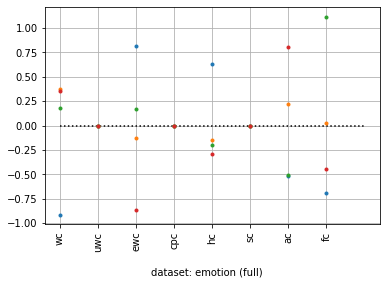

- [0.6146842  0.         0.77412081 0.        ]
- [-0.60574403  0.          0.0445521   0.        ]
- [0.04016155 0.         0.01163468 0.        ]
- [-0.04910173  0.         -0.8303076   0.        ]


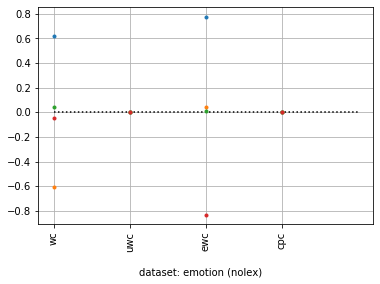

- [ 0.60484462  0.         -0.54508051 -0.70575778]
- [-0.1352441   0.          0.23142353  0.03415287]
- [-0.18923609  0.         -0.49539968  1.11028272]
- [-0.28036443  0.          0.80905666 -0.43867781]


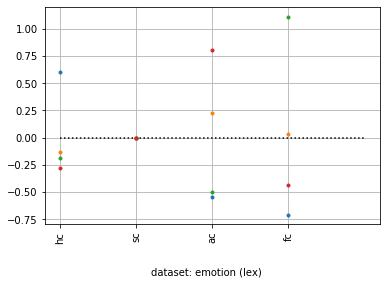

- [-1.42696914  0.          0.85823797  0.          0.61534719  0.
 -0.58205729 -0.71954766]
- [ 0.44226322  0.         -0.15991093  0.         -0.14625855  0.
  0.22481218  0.04008513]
- [ 0.39786148  0.          0.09692795  0.         -0.1861778   0.
 -0.46370765  1.11205197]
- [ 0.58684444  0.         -0.79525498  0.         -0.28291084  0.
  0.82095276 -0.43258944]


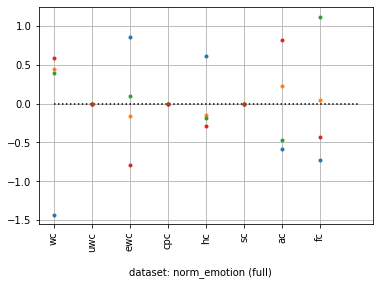

- [0.57728024 0.         0.73525271 0.        ]
- [-0.70166691  0.         -0.03326417  0.        ]
- [0.12692306 0.         0.05961514 0.        ]
- [-0.00253639  0.         -0.76160368  0.        ]


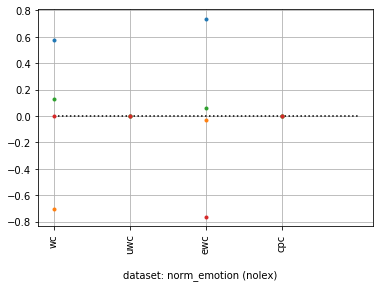

- [ 0.57499826  0.         -0.61208911 -0.72728884]
- [-0.13176107  0.          0.23291314  0.04091232]
- [-0.17690031  0.         -0.44833695  1.10661567]
- [-0.26633688  0.          0.82751291 -0.42023915]


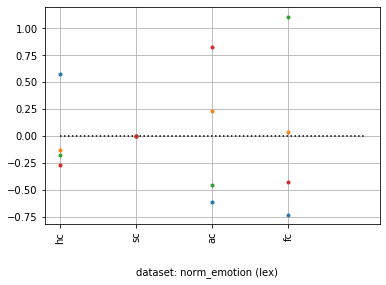

- [-0.68243033 -0.60189158  2.03668302  0.02557451  0.41047346  0.
 -0.41274219 -0.5308625 ]
- [-0.9535299  -0.61923207  0.59316543  0.06249993 -0.04037666  0.
  0.08245503 -0.30551191]
- [ 0.84979542  1.10626248 -1.03702938 -0.03540903 -0.21445168  0.
 -0.52266233  1.08614767]
- [ 0.7861648   0.11486117 -1.59281907 -0.05266541 -0.15564512  0.
  0.85294949 -0.24977327]


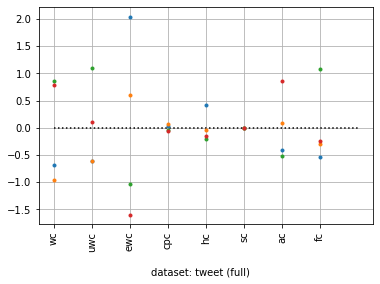

- [-0.32667896 -0.55139128  2.48003972  0.03756373]
- [-2.07432444 -0.44466157  0.84727539  0.07659182]
- [ 1.07563289  0.99026884 -1.30984183 -0.0367224 ]
- [ 1.3253705   0.00578401 -2.01747329 -0.07743316]


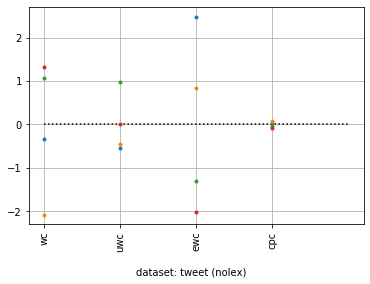

- [ 0.37791999  0.         -0.39169569 -0.56071544]
- [-0.0712265   0.          0.09337692 -0.34790946]
- [-0.18672494  0.         -0.58545071  1.15408855]
- [-0.11996855  0.          0.88376948 -0.24546366]


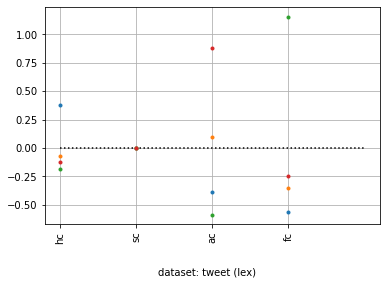

- [-0.89880663 -0.65978882  1.96820061 -0.02840781  0.41930281  0.
 -0.34078845 -0.47976239]
- [ 0.14106663 -1.08959369 -0.12061989  0.03153761 -0.0313489   0.
  0.14298468 -0.43646892]
- [ 0.59081925  1.28704821 -0.81726252  0.01043414 -0.22819859  0.
 -0.62280898  1.15573003]
- [ 0.16692074  0.4623343  -1.0303182  -0.01356394 -0.15975532  0.
  0.82061275 -0.23949872]


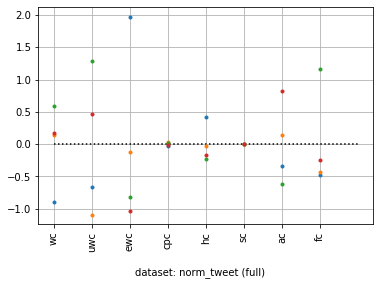

- [-0.43107975 -0.47348671  2.16555139 -0.03997754]
- [-0.74806305 -0.77604351  0.09086211  0.05150784]
- [ 1.92254457e-01  1.34256932e+00 -8.46006998e-01  9.63410858e-04]
- [ 0.98688834 -0.0930391  -1.4104065  -0.01249371]


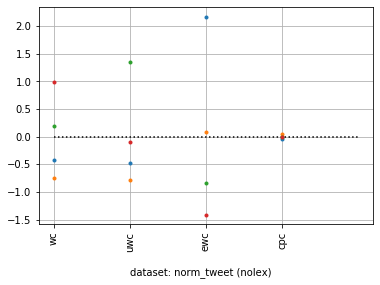

- [ 0.40935771  0.         -0.3981077  -0.58981519]
- [-0.01017308  0.          0.16596673 -0.4168083 ]
- [-0.22209171  0.         -0.57463234  1.17121352]
- [-0.17709292  0.          0.80677331 -0.16459004]


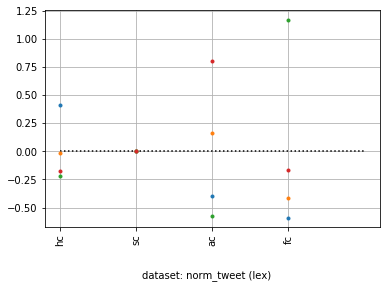

In [96]:
datasets = ["emotion", "norm_emotion", "tweet", "norm_tweet"]
features = {
    "full": ["wc", "uwc", "ewc", "cpc", "hc", "sc", "ac", "fc"],
    "nolex": ["wc", "uwc", "ewc", "cpc"],
    "lex": ["hc", "sc", "ac", "fc"]
}
classes = ["happiness", "sadness", "anger", "fear"]
norm_emotion_full = ["wc", "ewc", "hc", "ac", "fc"]

all_results = []
coefficients = []

for dataset in datasets: 
    for key, feature_set in features.items(): 
        results, coef = classify_with_lr(*load_lex_data(dataset, feature_set))
        all_results.append([dataset, key, *results])
        coefficients.append(coef)
    #results, coef = classify_with_lr(*load_vector_data(dataset))
    #all_results.append([dataset, "vec", *results])
    #coefficients.append(coef)

for index, result in enumerate(all_results): 
    draw_coefficients_plot(result[0], result[1], coefficients[index])
    #draw_confusion_matrix(*result)